In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [2]:
data = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
# Display the first few rows and general information about the dataset
data_head = data.head()
data_info = data.info()
data_description = data.describe()
data_head, data_info, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

(   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke   
 0           0.0     1.0       1.0        1.0  40.0     1.0     0.0  \
 1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
 2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
 3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
 4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   
 
    HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare   
 0                   0.0           0.0     0.0  ...            1.0  \
 1                   0.0           1.0     0.0  ...            0.0   
 2                   0.0           0.0     1.0  ...            1.0   
 3                   0.0           1.0     1.0  ...            1.0   
 4                   0.0           1.0     1.0  ...            1.0   
 
    NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education   
 0          0.0      5.0      18.0      15.0       1.0  0.0   9.0     

| Variable Name            | Description                                                                                         |
|--------------------------|----------------------------------------------------------------------------------------------------- |
| Diabet012                 |0 = no diabetes, 1 = prediabet , 2 = diabetes                                                        |
| HighBP                   | 0 = no high BP, 1 = high BP                                                                         |
| HighChol                 | 0 = no high cholesterol, 1 = high cholesterol                                                       |
| CholCheck                | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                           |
| BMI                      | Body Mass Index                                                                                     |
| Smoker                   | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no, 1 = yes |
| Stroke                   | (Ever told) you had a stroke. 0 = no, 1 = yes                                                       |
| HeartDiseaseorAttack     | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no, 1 = yes                          |
| PhysActivity             | physical activity in past 30 days - not including job 0 = no, 1 = yes                               |
| Fruits                   | Consume Fruit 1 or more times per day 0 = no, 1 = yes                                               |
| Veggies                  | Consume Vegetables 1 or more times per day 0 = no, 1 = yes                                          |
| HvyAlcoholConsump        | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no, 1 = yes |
| AnyHealthcare            | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no, 1 = yes |
| NoDocbcCost              | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no, 1 = yes |
| GenHlth                  | Would you say that in general your health is: scale 1-5 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor |
| MentHlth                 | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days |
| PhysHlth                 | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days |
| DiffWalk                 | Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes                           |
| Sex                      | 0 = female, 1 = male                                                                                 |
| Age                      | Age 13-level age category (_AGEG5YR see codebook) 1 = 18-24, 9 = 60-64, 13 = 80 or older              |
| Education                | Education Level Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten, 2 = Grades 1 through 8 (Elementary), 3 = Grades 9 through 11 (Some high school), 4 = Grade 12 or GED (High school graduate), 5 = College 1 year to 3 years (Some college or technical school), 6 = College 4 years or more (College graduate) |
| Income                   | Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more |



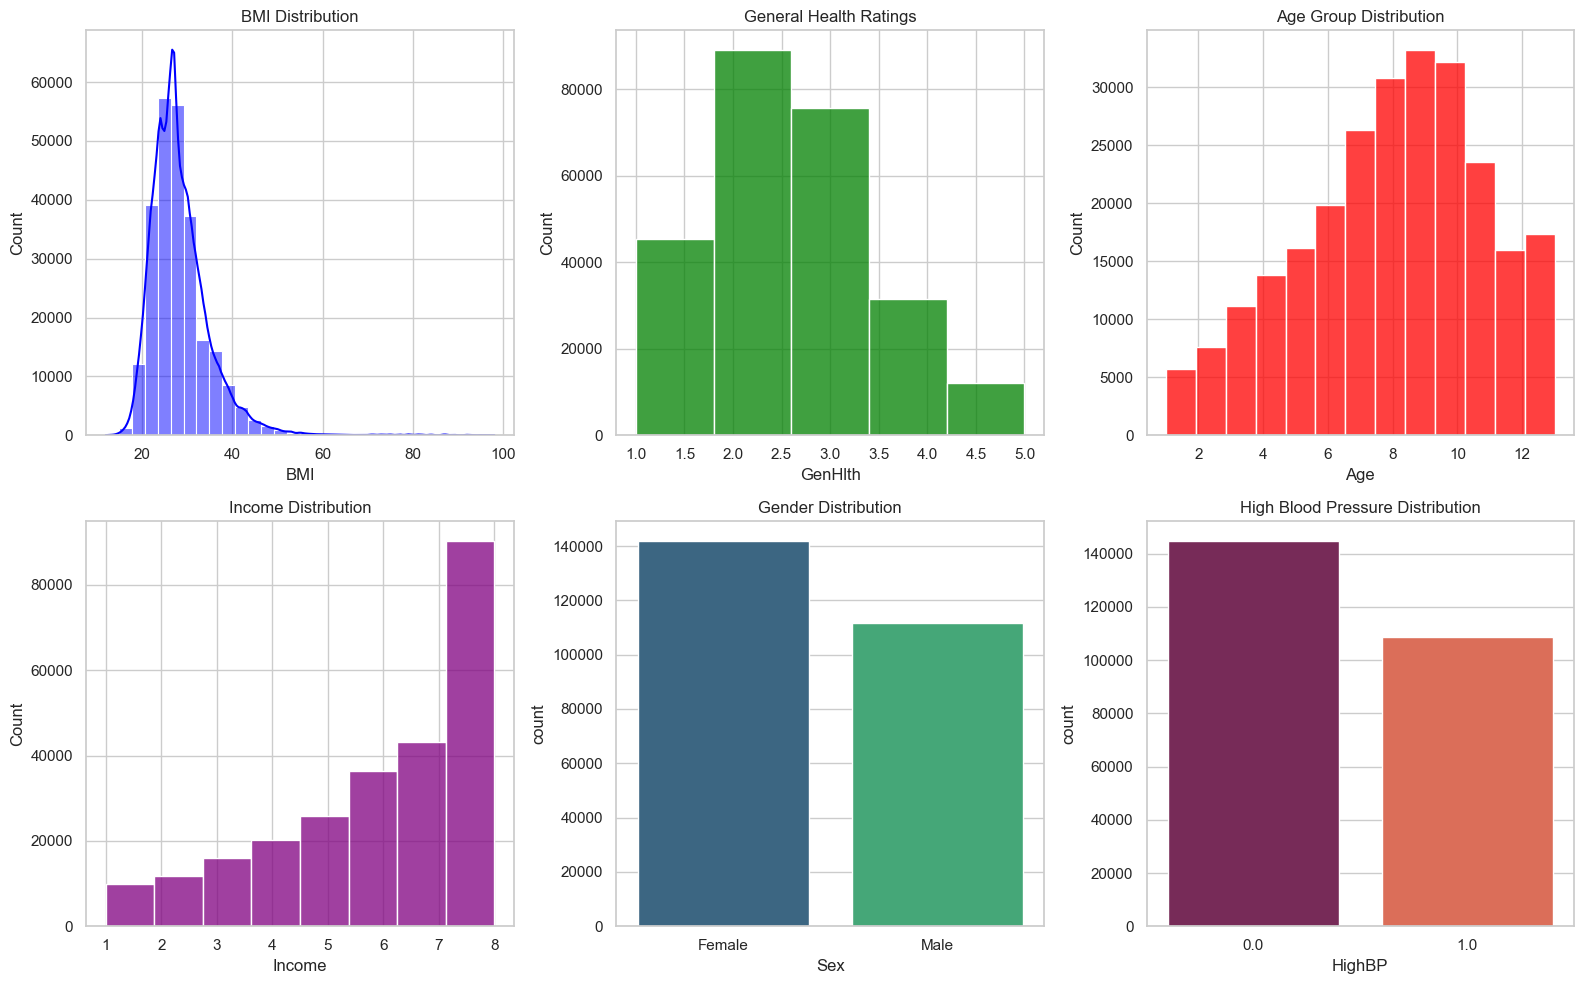

In [5]:
# Set the aesthetic style of the plots
sns.set_theme(style="whitegrid")

# Initialize the figure
plt.figure(figsize=(16, 10))

# Plot histograms for some selected columns
plt.subplot(2, 3, 1)
sns.histplot(data['BMI'], bins=30, kde=True, color='blue')
plt.title('BMI Distribution')

plt.subplot(2, 3, 2)
sns.histplot(data['GenHlth'], bins=5, color='green')
plt.title('General Health Ratings')

plt.subplot(2, 3, 3)
sns.histplot(data['Age'], bins=13, color='red')
plt.title('Age Group Distribution')

plt.subplot(2, 3, 4)
sns.histplot(data['Income'], bins=8, color='purple')
plt.title('Income Distribution')

plt.subplot(2, 3, 5)
sns.countplot(x='Sex', data=data, palette='viridis')
plt.xticks([0,1],["Female",'Male'])
plt.title('Gender Distribution')

plt.subplot(2, 3, 6)
sns.countplot(x='HighBP', data=data, palette='rocket')
plt.title('High Blood Pressure Distribution')

plt.tight_layout()
plt.show()

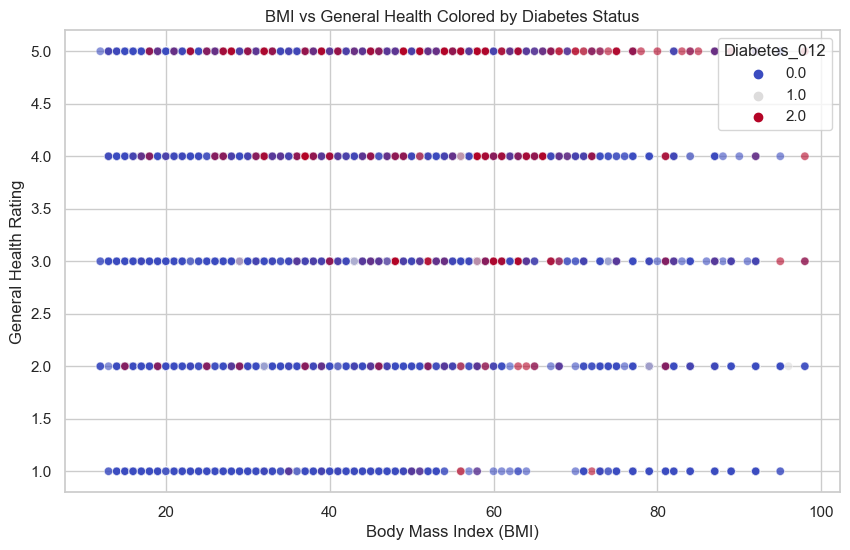

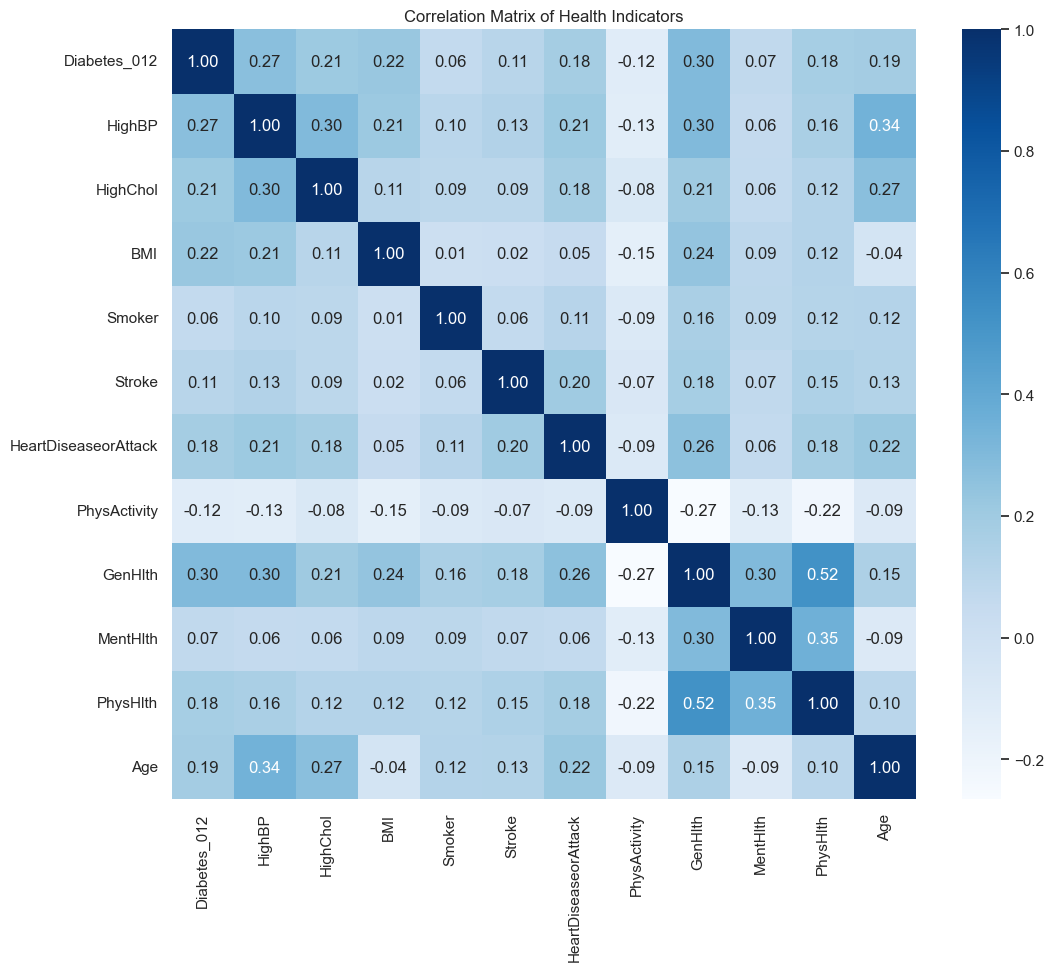

In [5]:
# Scatter plot between BMI and GenHlth colored by Diabetes status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='GenHlth', hue='Diabetes_012', data=data, palette='coolwarm', alpha=0.6)
plt.title('BMI vs General Health Colored by Diabetes Status')
plt.xlabel('Body Mass Index (BMI)')
plt.ylabel('General Health Rating')
plt.show()

# Correlation matrix of selected features
correlation_data = data[['Diabetes_012', 'HighBP', 'HighChol', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age']]
corr_matrix = correlation_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('Correlation Matrix of Health Indicators')
plt.show()

In [6]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

In [7]:
# Function to detect outliers using IQR
def detect_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    return outliers

# Check for outliers in BMI, MentHlth, and PhysHlth
outliers_bmi = detect_outliers(data, 'BMI')
outliers_menthlth = detect_outliers(data, 'MentHlth')
outliers_physhlth = detect_outliers(data, 'PhysHlth')

# Number of outliers detected
outlier_counts = {
    "BMI Outliers": len(outliers_bmi),
    "Mental Health Outliers": len(outliers_menthlth),
    "Physical Health Outliers": len(outliers_physhlth)
}

outlier_counts

{'BMI Outliers': 9847,
 'Mental Health Outliers': 36208,
 'Physical Health Outliers': 40949}

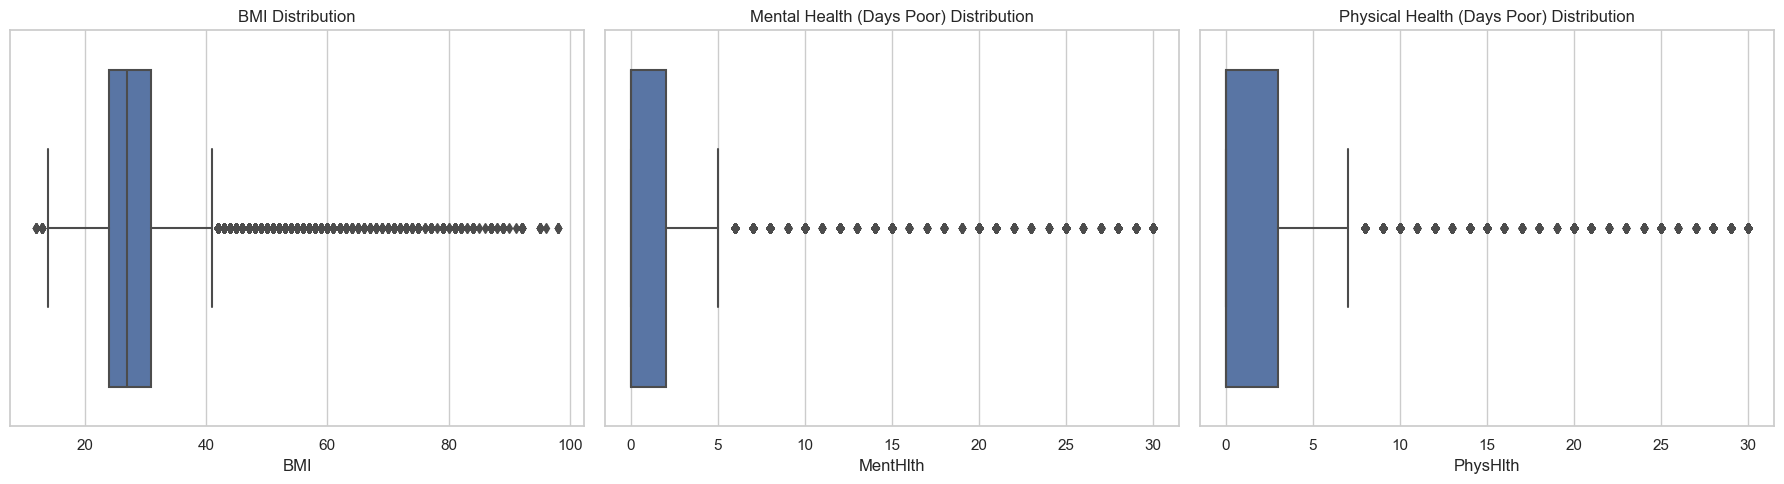

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
2415,2.0,1.0,1.0,1.0,63.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,30.0,1.0,1.0,9.0,3.0,5.0
2486,2.0,1.0,1.0,1.0,61.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,3.0,30.0,1.0,1.0,9.0,5.0,6.0
2547,0.0,1.0,0.0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,4.0,1.0,0.0,3.0,4.0,1.0
3125,0.0,1.0,0.0,1.0,61.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,3.0,5.0,1.0,0.0,5.0,5.0,2.0
3769,2.0,1.0,0.0,1.0,63.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,0.0,20.0,1.0,0.0,10.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243002,0.0,1.0,1.0,1.0,74.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,12.0,4.0,5.0
244309,0.0,1.0,1.0,1.0,95.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,5.0,9.0,1.0,0.0,8.0,4.0,5.0
244427,2.0,1.0,1.0,1.0,65.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,4.0,0.0,30.0,1.0,0.0,7.0,4.0,8.0
249875,0.0,0.0,0.0,1.0,63.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,5.0,0.0,0.0,0.0,6.0,5.0,5.0


In [14]:
# Check for any BMI values that are implausibly low or high
bmi_inaccuracies = data[(data['BMI'] < 12) | (data['BMI'] > 60)]

# Visualizing the outlier distribution for BMI, MentHlth, and PhysHlth
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x=data['BMI'])
plt.title('BMI Distribution')

plt.subplot(1, 3, 2)
sns.boxplot(x=data['MentHlth'])
plt.title('Mental Health (Days Poor) Distribution')

plt.subplot(1, 3, 3)
sns.boxplot(x=data['PhysHlth'])
plt.title('Physical Health (Days Poor) Distribution')

plt.tight_layout()
plt.show()

# Display any BMI inaccuracies found
bmi_inaccuracies

In [6]:
# Define features and target
X = data.drop('Diabetes_012', axis=1)  # all features except the target
y = data['Diabetes_012']  # target feature

# Initialize LDA and fit the model
lda = LDA(n_components=2)  # we choose 2 components as we have 3 classes (0, 1, 2)
X_lda = lda.fit_transform(X, y)

# Explained variance ratio by the LDA components
explained_variance_lda = lda.explained_variance_ratio_

X_lda.shape, explained_variance_lda

((253680, 2), array([0.99363456, 0.00636544]))

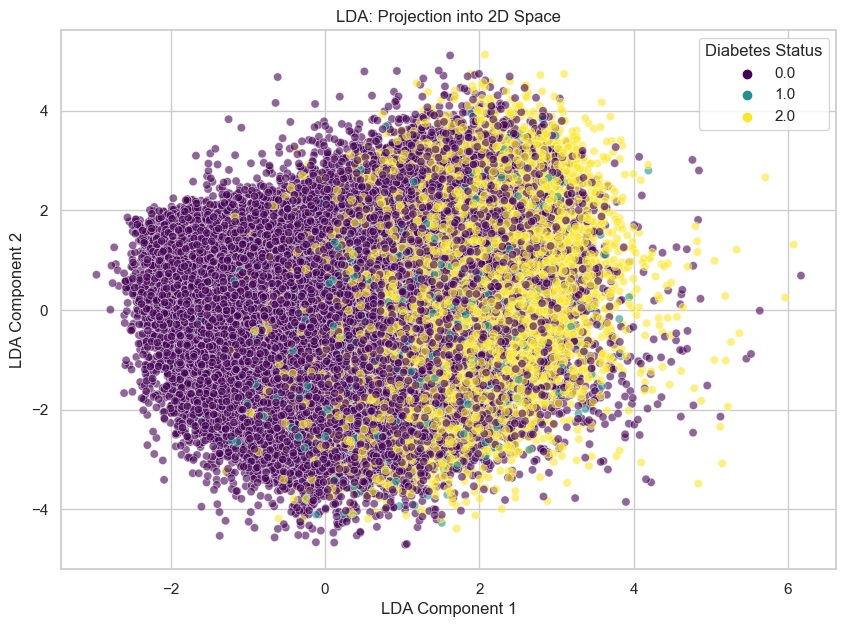

In [10]:
# Plotting the projections of the data points in the new 2D space created by LDA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y, palette='viridis', alpha=0.6, legend='full')
plt.title('LDA: Projection into 2D Space')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.legend(title='Diabetes Status')
plt.show()

In [7]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = X_scaled[0:10000]
y = y[0:10000]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the SVM classifier with default parameters
svm_model = SVC(random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy,'\n',classification_rep)

0.8226666666666667 
               precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2456
         1.0       0.00      0.00      0.00        60
         2.0       0.54      0.11      0.19       484

    accuracy                           0.82      3000
   macro avg       0.46      0.37      0.36      3000
weighted avg       0.77      0.82      0.77      3000



C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
# Balancing the dataset
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [12]:
# Initialize the SVM classifier with balanced class weights
svm_model = SVC(class_weight='balanced', random_state=42)

# Train the SVM model on the balanced training data
svm_model.fit(X_train, y_train)

# Predict on the testing data
y_pred = svm_model.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8389452332657201
Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.75      0.79      2476
         1.0       0.90      0.96      0.93      2492
         2.0       0.77      0.81      0.79      2427

    accuracy                           0.84      7395
   macro avg       0.84      0.84      0.84      7395
weighted avg       0.84      0.84      0.84      7395



In [16]:
parameters = {
    'C': [0.1, 1, 10],  
    'gamma': [0.1, 1, 10],  
    'kernel': ['rbf'], 
    'class_weight': ['balanced', {1: 10}],  
}

svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, parameters, cv=5, scoring='accuracy', verbose=1,n_jobs=6)
grid_search.fit(X_train, y_train)

# Best model after grid search
best_svm = grid_search.best_estimator_

# Predict on the testing data
y_pred = best_svm.predict(X_test)

# Calculate accuracy and display classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters: {'C': 10, 'class_weight': 'balanced', 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.93657876943881
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.94      0.91      2476
         1.0       1.00      0.98      0.99      2492
         2.0       0.94      0.88      0.91      2427

    accuracy                           0.94      7395
   macro avg       0.94      0.94      0.94      7395
weighted avg       0.94      0.94      0.94      7395

